To do:
- Add color scales to contour plots


### 1.Scaling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

array([[<AxesSubplot: title={'center': 'Temperature (deg C)'}>,
        <AxesSubplot: title={'center': 'Ultimate tensile strength (Pa)'}>]],
      dtype=object)

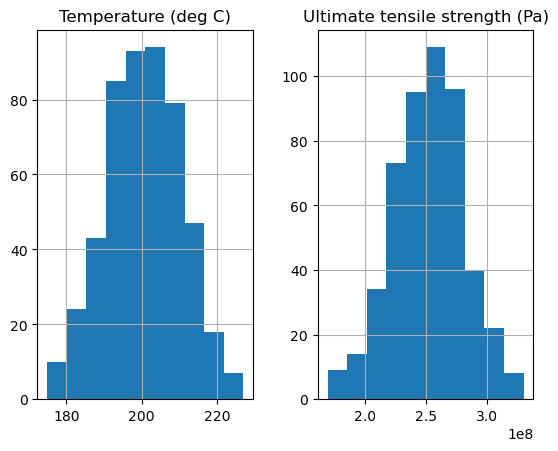

In [2]:
df = pd.read_csv('tensile_strength(2).csv')
df.hist()

array([[<AxesSubplot: title={'center': 'Temperature (deg C)'}>,
        <AxesSubplot: title={'center': 'Ultimate tensile strength (Pa)'}>]],
      dtype=object)

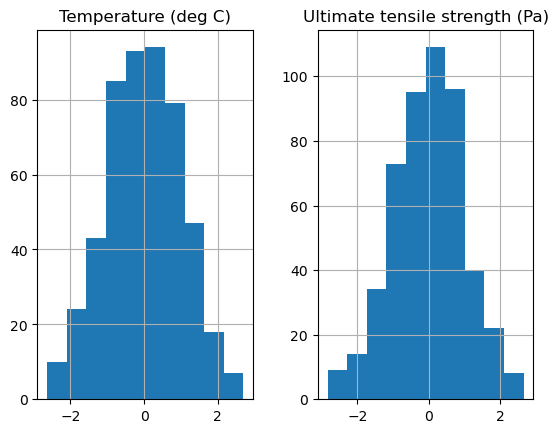

In [4]:
t_std = np.std(df['Temperature (deg C)'])
t_mean = df['Temperature (deg C)'].mean()
s_std = np.std(df['Ultimate tensile strength (Pa)'])
s_mean = df['Ultimate tensile strength (Pa)'].mean()

df['Temperature (deg C)'] = (df['Temperature (deg C)'] - t_mean)/t_std
df['Ultimate tensile strength (Pa)'] = (df['Ultimate tensile strength (Pa)'] - s_mean)/ s_std

s_scale = np.array(df['Ultimate tensile strength (Pa)'])
t_scale = np.array(df['Temperature (deg C)'])

df.hist()

Save these scaling values (mean, std) as youl need to apply them to test data

In [5]:
scArray = np.array([ [t_mean,s_mean], [t_std,s_std]])
np.savetxt('scaleParams.txt',scArray)

Load scaling datas from text file

In [6]:
loadedScales = np.loadtxt('scaleParams.txt')
loadedScales

array([[ 4.46354065e-15, -3.20188320e-15],
       [ 1.00000000e+00,  1.00000000e+00]])

### 2. Plotting Linear Discriminant Functions

In [7]:
w1 = np.array([[-1],[-3]])
w0 = 1
length = 21
x1 = np.linspace(0,1,length)
x2 = np.copy(x1)
x1grid,x2grid = np.meshgrid(x1,x2)
Xgrid = np.concatenate( (x1grid.reshape(length*length,1), x2grid.reshape(length*length,1))
, axis=1)

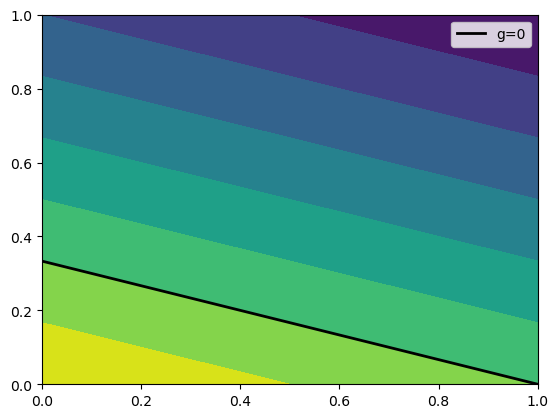

In [8]:
# Apply transformation
g = np.matmul(w1.T, Xgrid.T).T + w0
g = g.reshape(length,length)

# Plot contour
plt.contourf(x1,x2,g)
# Plot g= 0 line (eq by hand) : x2 = (1-x1)/3
g_0 = (1-x1)/3

plt.plot(x1,g_0, linewidth=2,color='black',label='g=0')
plt.legend()

### 3. Plot classification Areas

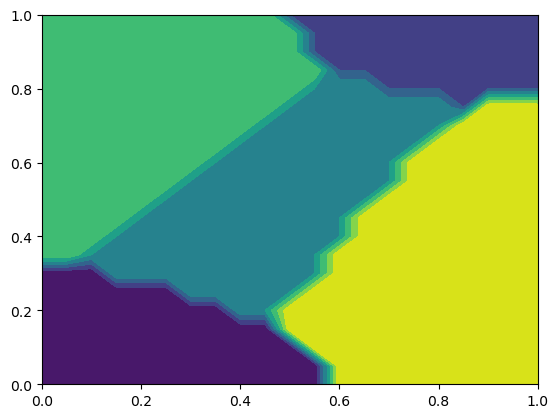

In [10]:
a1 = np.array([[1.3,-1,-3]]).T
a2 = np.array([[-2,1,2]]).T
a3 = np.array([[0.3,0.1,-0.1]]).T
a4 = np.array([[0,-1,1]]).T
a5 = np.array([[-0.2,1.5,-1]]).T

# Plotting classifications

Ygrid = np.concatenate([np.ones((length*length,1)), Xgrid], axis = 1) # add column of 1s

g1  = np.matmul(Ygrid,a1)
g2  = np.matmul(Ygrid,a2)
g3  = np.matmul(Ygrid,a3)
g4  = np.matmul(Ygrid,a4)
g5  = np.matmul(Ygrid,a5)

#combine funcs togethe
gconc = np.concatenate([g1,g2,g3,g4,g5],axis=1)

# find max value
omega = np.argmax(gconc,axis=1)

# put back 2D grid so it can easily be plotted
omega = np.reshape(omega, [length,length])

plt.contourf(x1,x2,omega)

### 3.1 Higher Order Functions

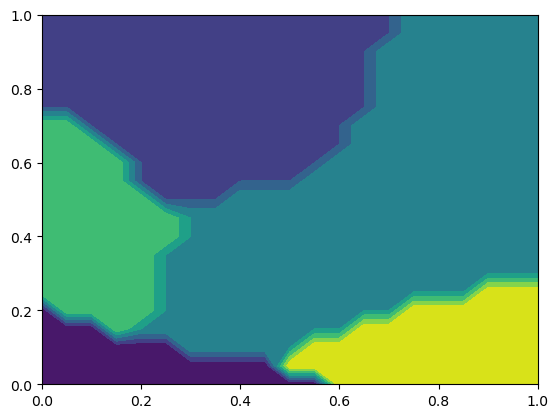

In [11]:
a1 = np.array([[1.3,-1,-3,-10]]).T
a2 = np.array([[-1,1.5,3,-1]]).T
a3 = np.array([[0.4,-0.1,-0.1,3]]).T
a4 = np.array([[0.5,-1,1,-0.1]]).T
a5 = np.array([[-0.2,1.5,-1,0.4]]).T

x1_x2 = np.array([Ygrid[:,1] * Ygrid[:,2]])
x1_x2 = x1_x2.reshape(length*length,1)

Ygrid = np.concatenate([Ygrid, x1_x2], axis = 1) # add column of 1s

g1  = np.matmul(Ygrid,a1)
g2  = np.matmul(Ygrid,a2)
g3  = np.matmul(Ygrid,a3)
g4  = np.matmul(Ygrid,a4)
g5  = np.matmul(Ygrid,a5)

#combine funcs togethe
gconc = np.concatenate([g1,g2,g3,g4,g5],axis=1)
# find max value
omega = np.argmax(gconc,axis=1)
# put back 2D grid so it can easily be plotted
omega = np.reshape(omega, [length,length])
# put back 2D grid so it can easily be plotted
omega = np.reshape(omega, [length,length])

plt.contourf(x1,x2,omega)

### Extra Plotting

C:\Users\feyzi\AppData\Local\Temp\ipykernel_30440\1273741326.py:3: UserWarning: Log scale: values of z <= 0 have been masked
  cs = ax.contourf(x1, x2, omega, locator=ticker.LogLocator(), cmap=cm.PuBu_r)


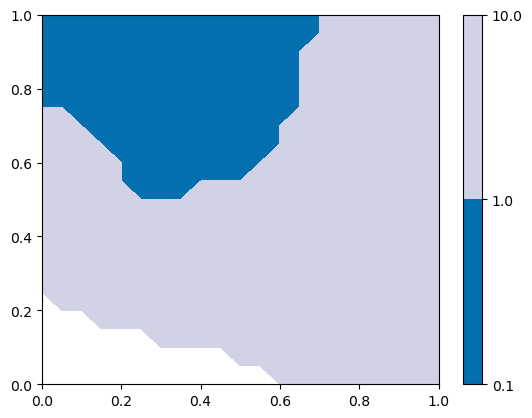

In [12]:
from matplotlib import ticker, cm
fig, ax = plt.subplots()
cs = ax.contourf(x1, x2, omega, locator=ticker.LogLocator(), cmap=cm.PuBu_r)
cbar = fig.colorbar(cs)
plt.show()